In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
%pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 53.1 MB/s eta 0:00:00


In [4]:
import csv
import pandas as pd
import numpy as np
import folium
import shapely
import geopandas

In [45]:
df_casas_0 = pd.read_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/casas_1_f_i .csv')

In [46]:
from shapely import wkt
df_casas_0['geo'] = df_casas_0['geo'].apply(wkt.loads)

In [47]:
xs = [point.x for point in df_casas_0.geo]
ys = [point.y for point in df_casas_0.geo]
df_casas_0['latitude'] = ys
df_casas_0['longitude'] = xs

In [48]:
df_casas_0.to_csv('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/final.csv', index = False)

In [33]:
la_paz_map_original= folium.Map(location =[df_casas_0.latitude.mean(),df_casas_0.longitude.mean()],
                       zoom_start = 13)

In [11]:
la_paz_map_original

In [12]:
for index, location_info in df_casas_0.iterrows():
  folium.CircleMarker([location_info["latitude"], location_info["longitude"]], radius = 5, color = 'purple',fill_color='purple', color_opacity = 0.2,fill_opacity = 0.2).add_to(la_paz_map_original)

In [34]:
df_casas_0.columns

Index(['Dir', 'Bed', 'Bath', 'Mts', 'Precio', 'geo', 'Cluster', 'latitude',
       'longitude'],
      dtype='object')

In [35]:
from folium.vector_layers import CircleMarker
for index, location_info in df_casas_0.iterrows():
  if location_info['Cluster'] == 0:
    folium.CircleMarker([location_info["latitude"], location_info["longitude"]], radius = 5, color = 'purple',fill_color='purple', color_opacity = 0.2,fill_opacity = 0.2).add_to(la_paz_map_original)    
  else:
    folium.CircleMarker([location_info["latitude"], location_info["longitude"]], radius = 5, color = 'darkblue', fill_color='darkblue', color_opacity = 0.2,fill_opacity = 0.2).add_to(la_paz_map_original)

In [36]:
la_paz_map_original

In [37]:
la_paz_map_original.save('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/map_original_f.html')

In [38]:
import folium.plugins

In [39]:
la_paz_heatmap= folium.Map(location =[df_casas_0.latitude.mean(),df_casas_0.longitude.mean()],
                       zoom_start = 13)

In [21]:
df_casas_0.columns

Index(['Dir', 'Bed', 'Bath', 'Mts', 'Precio', 'geo', 'Cluster', 'latitude',
       'longitude'],
      dtype='object')

In [40]:
folium.plugins.HeatMap(df_casas_0[['latitude','longitude', 'Precio']]).add_to(la_paz_heatmap)

In [41]:
la_paz_heatmap

In [42]:
la_paz_heatmap.save('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/heatmap_price_1.html')

In [49]:
df_casas_0[df_casas_0.Cluster == 0].describe()

Bed       Bath         Mts         Precio  Cluster   latitude  \
count  51.000000  51.000000   51.000000      51.000000     51.0  51.000000   
mean    3.797074   3.835934  405.008788  246770.655208      0.0 -16.540023   
std     0.739234   1.189640  159.160307   93345.666399      0.0   0.213578   
min     3.000000   2.000000  135.000000  117000.000000      0.0 -17.589508   
25%     3.000000   3.000000  284.500000  174139.000000      0.0 -16.550746   
50%     4.000000   4.000000  361.000000  229000.000000      0.0 -16.530357   
75%     4.000000   5.000000  533.030000  282500.000000      0.0 -16.507292   
max     6.000000   6.000000  803.000000  520000.000000      0.0 -15.544806   

       longitude  
count  51.000000  
mean  -68.062215  
std     0.236870  
min   -69.001060  
25%   -68.106159  
50%   -68.077020  
75%   -68.070081  
max   -66.956101

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_palette(palette='husl')

<Axes: xlabel='Precio', ylabel='Count'>

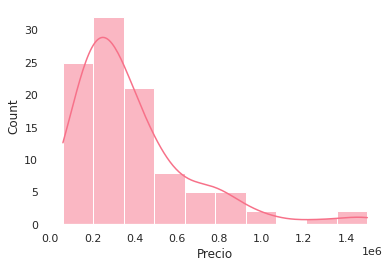

In [96]:
sns.histplot(df_casas_0.Precio, bins = 10, kde= True, fill= True)

In [ ]:
plt.savefig('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/histplot.png', dpi=300, bbox_inches = 'tight')

In [67]:
df_casas_0.columns

Index(['Dir', 'Bed', 'Bath', 'Mts', 'Precio', 'geo', 'Cluster', 'latitude',
       'longitude'],
      dtype='object')

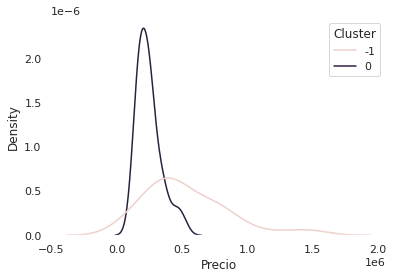

In [79]:
#sns.kdeplot(df_casas_0.Precio[df_casas_0.Cluster == 0], palette='purple')
#sns.rugplot(df_casas_0.)
sns.kdeplot(data= df_casas_0, x = 'Precio', hue = 'Cluster')
plt.savefig('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/kdeplot.png', dpi=300, bbox_inches = 'tight')

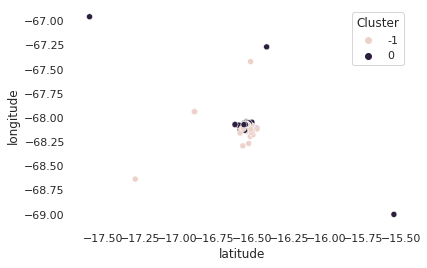

In [102]:
sns.scatterplot(data= df_casas_0, x = 'latitude', y='longitude', hue = 'Cluster')
#sns.rugplot(data= df_casas_0, x = 'Precio', hue = 'Cluster')
plt.savefig('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/scatter_ubication.png', dpi=300, bbox_inches = 'tight')

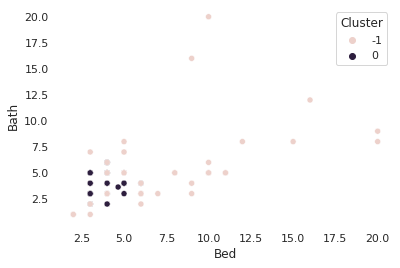

In [86]:
sns.scatterplot(data= df_casas_0, x = 'Bed', y='Bath', hue = 'Cluster')
#sns.rugplot(data= df_casas_0, x = 'Precio', hue = 'Cluster')
plt.savefig('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/scatter_bed_bath.png', dpi=300, bbox_inches = 'tight')

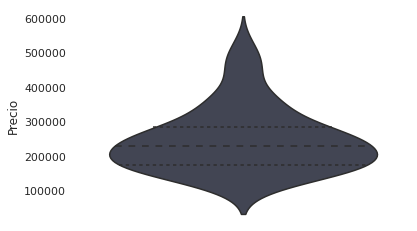

In [101]:
sns.violinplot(data= df_casas_0[df_casas_0.Cluster == 0], y= 'Precio'
, saturation = 0.4, inner = 'quartile', color='#353C60')
plt.savefig('/content/drive/MyDrive/Ironhack/Proyecto final ironhack/price_analysis.png', dpi=300, bbox_inches = 'tight')

In [103]:
df_re = df_casas_0[['Bed', 'Bath', 'Mts', 'Precio', 'Cluster', 'latitude',
       'longitude']][df_casas_0.Cluster == 0].copy()

In [104]:
from sklearn.tree import DecisionTreeRegressor

In [105]:
re_tree = DecisionTreeRegressor(criterion='poisson')

In [111]:
re_tree.fit(df_re.loc[:][:-1][['Bed', 'Bath', 'Mts','latitude',
       'longitude']], df_re.loc[:][:-1].Precio)

DecisionTreeRegressor(criterion='poisson')

In [117]:
re_tree.predict(df_re.loc[:][-1:][['Bed', 'Bath', 'Mts','latitude',
       'longitude']])

array([154000.])

In [118]:
df_re.loc[:][-1:].Precio

100    160800.0
Name: Precio, dtype: float64

In [126]:
re_tree.score(re_tree.predict(df_re.loc[:][:-1][['Bed', 'Bath', 'Mts','latitude',
       'longitude']]), df_re.loc[:][:-1].Precio)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


ValueError: ignored

In [120]:
from sklearn.ensemble import BaggingRegressor

In [122]:
re_bag = BaggingRegressor()

In [123]:
re_bag.fit(df_re.loc[:][:-1][['Bed', 'Bath', 'Mts','latitude',
       'longitude']], df_re.loc[:][:-1].Precio)

BaggingRegressor()

In [127]:
re_bag.predict(df_re.loc[:][-1:][['Bed', 'Bath', 'Mts','latitude',
       'longitude']])

array([176850.])

In [128]:
re_bag.score(df_re.loc[:][:-1][['Bed', 'Bath', 'Mts','latitude',
       'longitude']], df_re.loc[:][:-1].Precio)

0.8275964300236924